In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import mglearn
import matplotlib.pyplot as plt
import itertools
from csv import reader
from sklearn.model_selection import train_test_split,KFold, cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_curve,recall_score,classification_report,roc_curve, auc,classification_report
from sklearn.linear_model import LogisticRegression#逻辑回归
from sklearn.tree import DecisionTreeClassifier  #决策树
from sklearn.ensemble import RandomForestClassifier  # 随机森林
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('./model_sample.csv')

In [4]:
data.head()

,user_id,y,x_001,x_002,x_003,x_004,x_005,x_006,x_007,x_008,...,x_190,x_191,x_192,x_193,x_194,x_195,x_196,x_197,x_198,x_199
0,A00002,0,0.0,32.0,0,0,0,0,0,0,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,A00005,0,0.0,29.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A00006,0,0.0,31.0,0,0,0,0,0,0,...,2.0,2.0,4.0,4.0,6.0,6.0,6.0,6.0,10.0,10.0
3,A00008,0,0.0,22.0,0,0,0,0,0,0,...,3.0,3.0,3.0,3.0,5.0,5.0,3.0,3.0,7.0,7.0
4,A00009,0,0.0,31.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(data.shape)       # 输出行数和列数
data.columns.tolist()   # 显现数据的所有列名称
print(data.describe())  # 对数据的描述性统计

(11017, 201)
                  y         x_001         x_002         x_003         x_004  \
count  11017.000000  10986.000000  10986.000000  11017.000000  11017.000000   
mean       0.194608      0.155653     31.816221      0.147590      0.075157   
std        0.395917      0.362542      6.234252      0.354709      0.263656   
min        0.000000      0.000000     19.000000      0.000000      0.000000   
25%        0.000000      0.000000     27.250000      0.000000      0.000000   
50%        0.000000      0.000000     31.000000      0.000000      0.000000   
75%        0.000000      0.000000     35.000000      0.000000      0.000000   
max        1.000000      1.000000     59.000000      1.000000      1.000000   

              x_005         x_006         x_007         x_008         x_009  \
count  11017.000000  11017.000000  11017.000000  11017.000000  11017.000000   
mean       0.016066      0.023328      0.001634      0.000454      0.020695   
std        0.125735      0.150949     

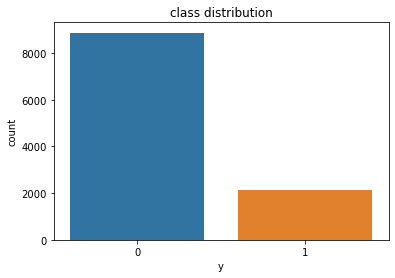

In [6]:
plt.figure()
ax = sns.countplot(x = 'y',data = data)
plt.title('class distribution')
plt.show()

In [7]:
num = len(data)
num_overdue = len(data[data['y'] == 1])
print("总交易笔数",num)
print("诈骗交易次数", num_overdue)
print("诈骗交易比例：{:.6f}".format(num_overdue/num))

总交易笔数 11017
诈骗交易次数 2144
诈骗交易比例：0.194608


In [8]:
data.x_01 = data.x_001
data.x_02 = data.x_002
data.x_03 = 2*data.x_003 + 1*data.x_004
data.x_04 = data.x_005
data.x_05 = data.x_006
data.x_06 = data.x_009
data.x_07 = data.x_014
data.x_08 = 5*data.x_022 + 4*data.x_023 + 3*data.x_024 + 2*data.x_025 + 1*data.x_026
data.x_09 = 5*data.x_028 + 4*data.x_029 + 3*data.x_030 + 2*data.x_031 + 1*data.x_032
data.x_10 = data.x_041
data.x_11 = data.x_045
data.x_12 = data.x_046
data.x_13 = data.x_048
data.x_14 = data.x_052
data.x_15 = data.x_053
data.x_16 = data.x_131
data.x_17 = data.x_133 / data.x_134
data.x_18 = data.x_138 / data.x_139
data.x_19 = data.x_143 / data.x_144
data.x_20 = data.x_155 / data.x_153
data.x_21 = data.x_168 / data.x_166
data.x_22 = data.x_181 / data.x_179
data.x_23 = 1 - data.x_189 / data.x_188
data.x_24 = 1 - data.x_191 / data.x_190
data.x_25 = 1 - data.x_193 / data.x_192
data.x_26 = 1 - data.x_195 / data.x_194
data.x_27 = 1 - data.x_197 / data.x_196
data.x_28 = 1 - data.x_199 / data.x_198

In [9]:
data.x_001 = data.x_01
data.x_002 = data.x_02
data.x_003 = data.x_03
data.x_004 = data.x_04
data.x_005 = data.x_05
data.x_006 = data.x_06
data.x_007 = data.x_07
data.x_008 = data.x_08
data.x_009 = data.x_09
data.x_010 = data.x_10
data.x_011 = data.x_11
data.x_012 = data.x_12
data.x_013 = data.x_13
data.x_014 = data.x_14
data.x_015 = data.x_15
data.x_016 = data.x_16
data.x_017 = data.x_17
data.x_018 = data.x_18
data.x_019 = data.x_19
data.x_020 = data.x_20
data.x_021 = data.x_21
data.x_022 = data.x_22
data.x_023 = data.x_23
data.x_024 = data.x_24
data.x_025 = data.x_25
data.x_026 = data.x_26
data.x_027 = data.x_27
data.x_028 = data.x_28

In [10]:
data.drop(data.columns[30:201], axis=1, inplace=True)     # 删除前剩余列

In [11]:
data[:]

,user_id,y,x_001,x_002,x_003,x_004,x_005,x_006,x_007,x_008,...,x_019,x_020,x_021,x_022,x_023,x_024,x_025,x_026,x_027,x_028
0,A00002,0,0.0,32.0,0,0,0,1,1,7,...,1365.000000,0.500000,0.500000,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,A00005,0,0.0,29.0,0,0,0,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A00006,0,0.0,31.0,0,0,0,0,1,7,...,3000.000000,0.714286,0.578947,0.620690,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,A00008,0,0.0,22.0,0,0,0,0,0,2,...,19000.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,A00009,0,0.0,31.0,0,0,0,0,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,A21934,0,0.0,29.0,0,0,0,0,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11013,A21936,1,0.0,25.0,0,0,0,0,1,8,...,2308.333333,0.970588,0.956522,0.913462,0.0,0.0,0.000000,0.0,0.000000,0.000000
11014,A21938,0,0.0,28.0,0,0,0,0,0,4,...,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
11015,A21940,0,0.0,23.0,0,0,0,0,0,5,...,1316.666667,0.000000,0.000000,0.000000,1.0,1.0,0.666667,0.8,0.666667,0.857143


In [12]:
pd.set_option('display.max_columns', None)
data = data.fillna(0)

In [13]:
print(data.shape)       # 输出行数和列数
data.columns.tolist()   # 显现数据的所有列名称
print(data.describe())  # 对数据的描述性统计

(11017, 30)
                  y         x_001         x_002         x_003         x_004  \
count  11017.000000  11017.000000  11017.000000  11017.000000  11017.000000   
mean       0.194608      0.155215     31.726695      0.370337      0.016066   
std        0.395917      0.362126      6.449584      0.780866      0.125735   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000     27.000000      0.000000      0.000000   
50%        0.000000      0.000000     31.000000      0.000000      0.000000   
75%        0.000000      0.000000     35.000000      0.000000      0.000000   
max        1.000000      1.000000     59.000000      3.000000      1.000000   

              x_005         x_006         x_007         x_008         x_009  \
count  11017.000000  11017.000000  11017.000000  11017.000000  11017.000000   
mean       0.023328      0.020695      0.503676      5.592266      7.275756   
std        0.150949      0.142369      

In [14]:
#数据标准化 ， x_002,x_008,x_009,x_010,x_012,x_013,x_014,x_015,x_016,x_017,x_018,x_019,需要做标准化处理
data['normx_002'] = StandardScaler().fit_transform(data['x_002'].values.reshape(-1, 1))
data = data.drop(['x_002'],axis=1)
data['normx_008'] = StandardScaler().fit_transform(data['x_008'].values.reshape(-1, 1))
data = data.drop(['x_008'],axis=1)
data['normx_009'] = StandardScaler().fit_transform(data['x_009'].values.reshape(-1, 1))
data = data.drop(['x_009'],axis=1)
data['normx_010'] = StandardScaler().fit_transform(data['x_010'].values.reshape(-1, 1))
data = data.drop(['x_010'],axis=1)
data['normx_011'] = StandardScaler().fit_transform(data['x_011'].values.reshape(-1, 1))
data = data.drop(['x_011'],axis=1)
data['normx_012'] = StandardScaler().fit_transform(data['x_012'].values.reshape(-1, 1))
data = data.drop(['x_012'],axis=1)
data['normx_013'] = StandardScaler().fit_transform(data['x_013'].values.reshape(-1, 1))
data = data.drop(['x_013'],axis=1)
data['normx_014'] = StandardScaler().fit_transform(data['x_014'].values.reshape(-1, 1))
data = data.drop(['x_014'],axis=1)
data['normx_015'] = StandardScaler().fit_transform(data['x_015'].values.reshape(-1, 1))
data = data.drop(['x_015'],axis=1)
data['normx_016'] = StandardScaler().fit_transform(data['x_016'].values.reshape(-1, 1))
data = data.drop(['x_016'],axis=1)
data['normx_017'] = StandardScaler().fit_transform(data['x_017'].values.reshape(-1, 1))
data = data.drop(['x_017'],axis=1)
data['normx_018'] = StandardScaler().fit_transform(data['x_018'].values.reshape(-1, 1))
data = data.drop(['x_018'],axis=1)
data['normx_019'] = StandardScaler().fit_transform(data['x_019'].values.reshape(-1, 1))
data = data.drop(['x_019'],axis=1)
data.head()

,user_id,y,x_001,x_003,x_004,x_005,x_006,x_007,x_020,x_021,x_022,x_023,x_024,x_025,x_026,x_027,x_028,normx_002,normx_008,normx_009,normx_010,normx_011,normx_012,normx_013,normx_014,normx_015,normx_016,normx_017,normx_018,normx_019
0,A00002,0,0.0,0,0,0,1,1,0.500000,0.500000,0.50000,0.0,0.0,0.0,0.0,0.0,0.0,0.042378,0.409376,0.115076,-0.223667,-0.226369,-0.209497,0.625815,0.043957,-0.059320,0.002681,0.207527,0.010039,-0.065582
1,A00005,0,0.0,0,0,0,0,1,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,-0.422790,-0.753844,-0.202707,1.171927,-0.191260,-0.068992,-0.404122,-0.199212,-0.254997,-0.311875,-0.261402,-0.294132,-0.340394
2,A00006,0,0.0,0,0,0,0,1,0.714286,0.578947,0.62069,0.0,0.0,0.0,0.0,0.0,0.0,-0.112678,0.409376,-0.043815,-0.257706,-0.097242,-0.097330,0.007853,0.206959,0.398689,0.206624,0.769213,0.374374,0.263590
3,A00008,0,0.0,0,0,0,0,0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,-1.508180,-1.044649,-0.520490,-0.427901,-0.269222,-0.224259,-0.404122,-0.199212,-0.254997,2.971948,-0.261402,-0.294132,3.484838
4,A00009,0,0.0,0,0,0,0,0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,-0.112678,0.118571,-1.156057,-0.495979,-0.275687,-0.252337,-0.404122,-0.199212,-0.254997,-0.311875,-0.261402,-0.294132,-0.340394


In [16]:
data= data.drop('user_id',1)
data[:]

,y,x_001,x_003,x_004,x_005,x_006,x_007,x_020,x_021,x_022,x_023,x_024,x_025,x_026,x_027,x_028,normx_002,normx_008,normx_009,normx_010,normx_011,normx_012,normx_013,normx_014,normx_015,normx_016,normx_017,normx_018,normx_019
0,0,0.0,0,0,0,1,1,0.500000,0.500000,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.042378,0.409376,0.115076,-0.223667,-0.226369,-0.209497,0.625815,0.043957,-0.059320,0.002681,0.207527,0.010039,-0.065582
1,0,0.0,0,0,0,0,1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,-0.422790,-0.753844,-0.202707,1.171927,-0.191260,-0.068992,-0.404122,-0.199212,-0.254997,-0.311875,-0.261402,-0.294132,-0.340394
2,0,0.0,0,0,0,0,1,0.714286,0.578947,0.620690,0.0,0.0,0.000000,0.0,0.000000,0.000000,-0.112678,0.409376,-0.043815,-0.257706,-0.097242,-0.097330,0.007853,0.206959,0.398689,0.206624,0.769213,0.374374,0.263590
3,0,0.0,0,0,0,0,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,-1.508180,-1.044649,-0.520490,-0.427901,-0.269222,-0.224259,-0.404122,-0.199212,-0.254997,2.971948,-0.261402,-0.294132,3.484838
4,0,0.0,0,0,0,0,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,-0.112678,0.118571,-1.156057,-0.495979,-0.275687,-0.252337,-0.404122,-0.199212,-0.254997,-0.311875,-0.261402,-0.294132,-0.340394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,0,0.0,0,0,0,0,1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,-0.422790,-0.463039,-0.361599,-0.495979,-0.275687,-0.252337,-0.404122,-0.199212,-0.254997,-0.311875,-0.261402,-0.294132,-0.340394
11013,1,0.0,0,0,0,0,1,0.970588,0.956522,0.913462,0.0,0.0,0.000000,0.0,0.000000,0.000000,-1.043013,0.700181,-0.838274,1.103850,0.877749,0.582616,-0.404122,-0.199212,-0.254997,0.725122,1.799828,0.318666,0.124338
11014,0,0.0,0,0,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,-0.577846,-0.463039,-0.838274,-0.495979,-0.275687,-0.252337,-0.404122,-0.199212,-0.254997,-0.311875,-0.261402,-0.294132,-0.340394
11015,0,0.0,0,0,0,0,0,0.000000,0.000000,0.000000,1.0,1.0,0.666667,0.8,0.666667,0.857143,-1.353125,-0.172234,-0.520490,-0.427901,-0.267770,-0.217953,-0.404122,-0.199212,-0.254997,-0.229779,-0.098222,-0.000732,-0.075313


In [17]:
data[data.y == 1].index

Int64Index([    7,     9,    14,    18,    21,    25,    35,    43,    44,
               54,
            ...
            10948, 10951, 10953, 10954, 10958, 10960, 10972, 10979, 11013,
            11016],
           dtype='int64', length=2144)

In [18]:
X = data.iloc[:, data.columns != 'y']
y = data.iloc[:, data.columns == 'y']
# 得到所有异常样本的索引
number_records_fraud = len(data[data.y == 1])
fraud_indices = np.array(data[data.y == 1].index)
# 得到所有正常样本的索引
normal_indices = data[data.y == 0].index
# 在正常样本中随机采样出指定个数的样本，并取其索引
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
# 有了正常和异常样本后把它们的索引都拿到手
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
# 根据索引得到下采样所有样本点
under_sample_data = data.iloc[under_sample_indices,:]
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'y']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'y']
# 下采样 样本比例
print("正常样本所占整体比例: ", len(under_sample_data[under_sample_data.y == 0])/len(under_sample_data))
print("异常样本所占整体比例: ", len(under_sample_data[under_sample_data.y == 1])/len(under_sample_data))
print("下采样策略总体样本数量: ", len(under_sample_data))

正常样本所占整体比例:  0.5
异常样本所占整体比例:  0.5
下采样策略总体样本数量:  4288


In [19]:
# 整个数据集进行划分
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0,stratify = y)

print("原始训练集包含样本数量: ", len(X_train))
print("原始测试集包含样本数量: ", len(X_test))
print("原始样本总数: ", len(X_train)+len(X_test))

# 下采样数据集进行划分
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("下采样训练集包含样本数量: ", len(X_train_undersample))
print("下采样测试集包含样本数量: ", len(X_test_undersample))
print("下采样样本总数: ", len(X_train_undersample)+len(X_test_undersample))

原始训练集包含样本数量:  7711
原始测试集包含样本数量:  3306
原始样本总数:  11017

下采样训练集包含样本数量:  3001
下采样测试集包含样本数量:  1287
下采样样本总数:  4288


In [20]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(5,shuffle=False) 

    # 定义不同力度的正则化惩罚力度
    c_param_range = [0.01,0.1,1,10,100]
    # 展示结果用的表格
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # k-fold 表示K折的交叉验证，这里会得到两个索引集合: 训练集 = indices[0], 验证集 = indices[1]
    j = 0
    #循环遍历不同的参数
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('正则化惩罚力度: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        
        #一步步分解来执行交叉验证
        for iteration, indices in enumerate(fold.split(x_train_data)): 

            # 指定算法模型，并且给定参数
            lr = LogisticRegression(C = c_param, penalty='l1',solver='liblinear')

            # 训练模型，注意索引不要给错了，训练的时候一定传入的是训练集，所以X和Y的索引都是0
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # 建立好模型后，预测模型结果，这里用的就是验证集，索引为1
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # 有了预测结果之后就可以来进行评估了，这里recall_score需要传入预测值和真实值。
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            # 一会还要算平均，所以把每一步的结果都先保存起来。
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': 召回率 = ', recall_acc)

        # 当执行完所有的交叉验证后，计算平均结果
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('平均召回率 ', np.mean(recall_accs))
        print('')
        
    #找到最好的参数，哪一个Recall高，自然就是最好的了。
    best_c = results_table.loc[results_table['Mean recall score'].astype('float32').idxmax()]['C_parameter']
    
    # 打印最好的结果
    print('*********************************************************************************')
    print('效果最好的模型所选参数 = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [21]:
#逻辑回归
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

-------------------------------------------
正则化惩罚力度:  0.01
-------------------------------------------

Iteration  0 : 召回率 =  0.5822368421052632
Iteration  1 : 召回率 =  0.477124183006536
Iteration  2 : 召回率 =  0.5050847457627119
Iteration  3 : 召回率 =  0.4712230215827338
Iteration  4 : 召回率 =  0.45484949832775917

平均召回率  0.49810365815700086

-------------------------------------------
正则化惩罚力度:  0.1
-------------------------------------------

Iteration  0 : 召回率 =  0.5953947368421053
Iteration  1 : 召回率 =  0.5816993464052288
Iteration  2 : 召回率 =  0.5661016949152542
Iteration  3 : 召回率 =  0.5467625899280576
Iteration  4 : 召回率 =  0.5986622073578596

平均召回率  0.577724115089701

-------------------------------------------
正则化惩罚力度:  1
-------------------------------------------

Iteration  0 : 召回率 =  0.6118421052631579
Iteration  1 : 召回率 =  0.5718954248366013
Iteration  2 : 召回率 =  0.559322033898305
Iteration  3 : 召回率 =  0.539568345323741
Iteration  4 : 召回率 =  0.5852842809364549

平均召回率  0.5735824380516

In [22]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(5,shuffle=False) 

    # 定义不同力度的正则化惩罚力度
    c_param_range = [0.01,0.1,1,10,100]
    # 展示结果用的表格
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # k-fold 表示K折的交叉验证，这里会得到两个索引集合: 训练集 = indices[0], 验证集 = indices[1]
    j = 0
    #循环遍历不同的参数
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('正则化惩罚力度: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        
        #一步步分解来执行交叉验证
        for iteration, indices in enumerate(fold.split(x_train_data)): 

            # 指定算法模型，并且给定参数
            dtc = DecisionTreeClassifier(max_depth=5)

            # 训练模型，注意索引不要给错了，训练的时候一定传入的是训练集，所以X和Y的索引都是0
            dtc.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # 建立好模型后，预测模型结果，这里用的就是验证集，索引为1
            y_pred_undersample = dtc.predict(x_train_data.iloc[indices[1],:].values)

            # 有了预测结果之后就可以来进行评估了，这里recall_score需要传入预测值和真实值。
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            # 一会还要算平均，所以把每一步的结果都先保存起来。
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': 召回率 = ', recall_acc)

        # 当执行完所有的交叉验证后，计算平均结果
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('平均召回率 ', np.mean(recall_accs))
        print('')
        
    #找到最好的参数，哪一个Recall高，自然就是最好的了。
    best_c = results_table.loc[results_table['Mean recall score'].astype('float32').idxmax()]['C_parameter']
    
    # 打印最好的结果
    print('*********************************************************************************')
    print('效果最好的模型所选参数 = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [23]:
#决策树
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

-------------------------------------------
正则化惩罚力度:  0.01
-------------------------------------------

Iteration  0 : 召回率 =  0.7072368421052632
Iteration  1 : 召回率 =  0.7516339869281046
Iteration  2 : 召回率 =  0.6983050847457627
Iteration  3 : 召回率 =  0.658273381294964
Iteration  4 : 召回率 =  0.6622073578595318

平均召回率  0.6955313305867252

-------------------------------------------
正则化惩罚力度:  0.1
-------------------------------------------

Iteration  0 : 召回率 =  0.7072368421052632
Iteration  1 : 召回率 =  0.7516339869281046
Iteration  2 : 召回率 =  0.6983050847457627
Iteration  3 : 召回率 =  0.6546762589928058
Iteration  4 : 召回率 =  0.6622073578595318

平均召回率  0.6948119061262936

-------------------------------------------
正则化惩罚力度:  1
-------------------------------------------

Iteration  0 : 召回率 =  0.7105263157894737
Iteration  1 : 召回率 =  0.7516339869281046
Iteration  2 : 召回率 =  0.6983050847457627
Iteration  3 : 召回率 =  0.658273381294964
Iteration  4 : 召回率 =  0.6622073578595318

平均召回率  0.6961892253235

In [24]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(5,shuffle=False) 

    # 定义不同力度的正则化惩罚力度
    c_param_range = [0.01,0.1,1,10,100]
    # 展示结果用的表格
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # k-fold 表示K折的交叉验证，这里会得到两个索引集合: 训练集 = indices[0], 验证集 = indices[1]
    j = 0
    #循环遍历不同的参数
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('正则化惩罚力度: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        
        #一步步分解来执行交叉验证
        for iteration, indices in enumerate(fold.split(x_train_data)): 

            # 指定算法模型，并且给定参数
            rfc = RandomForestClassifier(max_depth=5)

            # 训练模型，注意索引不要给错了，训练的时候一定传入的是训练集，所以X和Y的索引都是0
            rfc.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # 建立好模型后，预测模型结果，这里用的就是验证集，索引为1
            y_pred_undersample = rfc.predict(x_train_data.iloc[indices[1],:].values)

            # 有了预测结果之后就可以来进行评估了，这里recall_score需要传入预测值和真实值。
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            # 一会还要算平均，所以把每一步的结果都先保存起来。
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': 召回率 = ', recall_acc)

        # 当执行完所有的交叉验证后，计算平均结果
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('平均召回率 ', np.mean(recall_accs))
        print('')
        
    #找到最好的参数，哪一个Recall高，自然就是最好的了。
    best_c = results_table.loc[results_table['Mean recall score'].astype('float32').idxmax()]['C_parameter']
    
    # 打印最好的结果
    print('*********************************************************************************')
    print('效果最好的模型所选参数 = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [25]:
#随机森林
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

-------------------------------------------
正则化惩罚力度:  0.01
-------------------------------------------

Iteration  0 : 召回率 =  0.7105263157894737
Iteration  1 : 召回率 =  0.7418300653594772
Iteration  2 : 召回率 =  0.7830508474576271
Iteration  3 : 召回率 =  0.7122302158273381
Iteration  4 : 召回率 =  0.7391304347826086

平均召回率  0.737353575843305

-------------------------------------------
正则化惩罚力度:  0.1
-------------------------------------------

Iteration  0 : 召回率 =  0.7302631578947368
Iteration  1 : 召回率 =  0.7450980392156863
Iteration  2 : 召回率 =  0.7762711864406779
Iteration  3 : 召回率 =  0.7086330935251799
Iteration  4 : 召回率 =  0.7525083612040134

平均召回率  0.7425547676560589

-------------------------------------------
正则化惩罚力度:  1
-------------------------------------------

Iteration  0 : 召回率 =  0.7335526315789473
Iteration  1 : 召回率 =  0.7418300653594772
Iteration  2 : 召回率 =  0.7762711864406779
Iteration  3 : 召回率 =  0.7086330935251799
Iteration  4 : 召回率 =  0.725752508361204

平均召回率  0.7372078970530

In [26]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    绘制混淆矩阵
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

召回率:  0.552870090634441


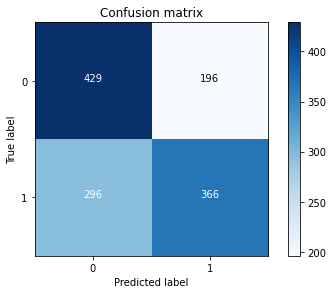

In [27]:
lr = lr = LogisticRegression(C = 10, penalty='l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# 计算所需值
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

召回率:  0.7099697885196374


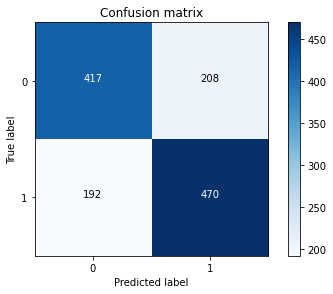

In [28]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = dtc.predict(X_test_undersample.values)

# 计算所需值
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

召回率:  0.7235649546827795


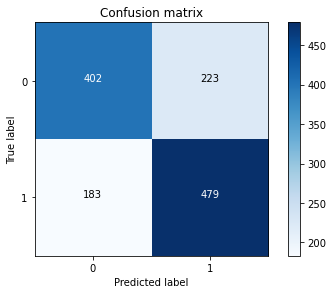

In [29]:
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = rfc.predict(X_test_undersample.values)

# 计算所需值
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [32]:
print('logistic regression')
print(classification_report(y_test_undersample, lr.predict(X_test_undersample)))
print('*****************************************************')
print('Decision tree')
print(classification_report(y_test_undersample, dtc.predict(X_test_undersample)))
print('*****************************************************')
print('Random forest')
print(classification_report(y_test_undersample, rfc.predict(X_test_undersample)))

logistic regression
              precision    recall  f1-score   support

           0       0.59      0.69      0.64       625
           1       0.65      0.55      0.60       662

    accuracy                           0.62      1287
   macro avg       0.62      0.62      0.62      1287
weighted avg       0.62      0.62      0.62      1287

*****************************************************
Decision tree
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       625
           1       0.69      0.71      0.70       662

    accuracy                           0.69      1287
   macro avg       0.69      0.69      0.69      1287
weighted avg       0.69      0.69      0.69      1287

*****************************************************
Random forest
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       625
           1       0.68      0.72      0.70       662

    accuracy              

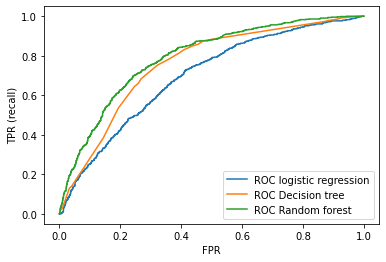

In [31]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, dtc.predict_proba(X_test)[:, 1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])

plt.plot(fpr_lr, tpr_lr, label="ROC logistic regression")

plt.plot(fpr_dtc, tpr_dtc, label="ROC Decision tree")

plt.plot(fpr_rfc, tpr_rfc, label="ROC Random forest")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.legend(loc=4)